In [32]:
import numpy as np
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import math

In [33]:
ekf_file = '../result/autobin_result/output_ekf_2_jul_(2)/current_pose.csv'

current_pose = np.loadtxt(ekf_file, delimiter=',', unpack=True)

print('Read \'%s\' successfully.' % ekf_file)

Read '../result/autobin_result/output_ekf_2_jul_(2)/current_pose.csv' successfully.


In [34]:
ref_file = '../result/autobin_result/output_ekf_2_jul_(2)/ref_pose.csv'

ref_pose = np.loadtxt(ref_file, delimiter=',', unpack=True)

print('Read \'%s\' successfully.' % ref_file)

Read '../result/autobin_result/output_ekf_2_jul_(2)/ref_pose.csv' successfully.


In [35]:
measurements = np.vstack((current_pose))
m = measurements.shape[1]
print(m)

37


In [36]:
ref_measurement = np.vstack((ref_pose))
o = ref_measurement.shape[1]
print(o)

37


In [37]:
ekf_x = np.vstack(current_pose[2])
ekf_y = np.vstack(current_pose[3])


In [38]:
ref_x = np.vstack(ref_pose[2])
ref_y = np.vstack(ref_pose[3])

In [39]:
def plotx():
    fig = plt.figure(figsize=(16,16))

    plt.subplot(311)
    plt.step(range(len(measurements[0])),ekf_x, label='$x (with-ekf)$')
    plt.step(range(len(measurements[0])),ref_x, label='$x (referrence)$')

    plt.title('X pose comparison - autobindata ($x$)')
    plt.legend(loc='best',prop={'size':22})
    plt.ylabel('Position (relative to start) [m]')

    plt.subplot(312)
    
    plt.step(range(len(measurements[0])),ekf_y, label='$y (with-ekf)$')
    plt.step(range(len(measurements[0])),ref_y, label='$y (referrence)$')

    plt.title('Y pose comparison - autobindata ($x$)')
    plt.legend(loc='best',prop={'size':22})
    plt.ylabel('Position (relative to start) [m]')

    #plt.ylim([0, 30])
    plt.legend(loc='best',prop={'size':16})
    plt.xlabel('Filter Step')


    #plt.savefig('graph/autobin/Autobin-data-EKF-with-scanmatching.png',
    #S            dpi=72, transparent=True, bbox_inches='tight')

plotx()

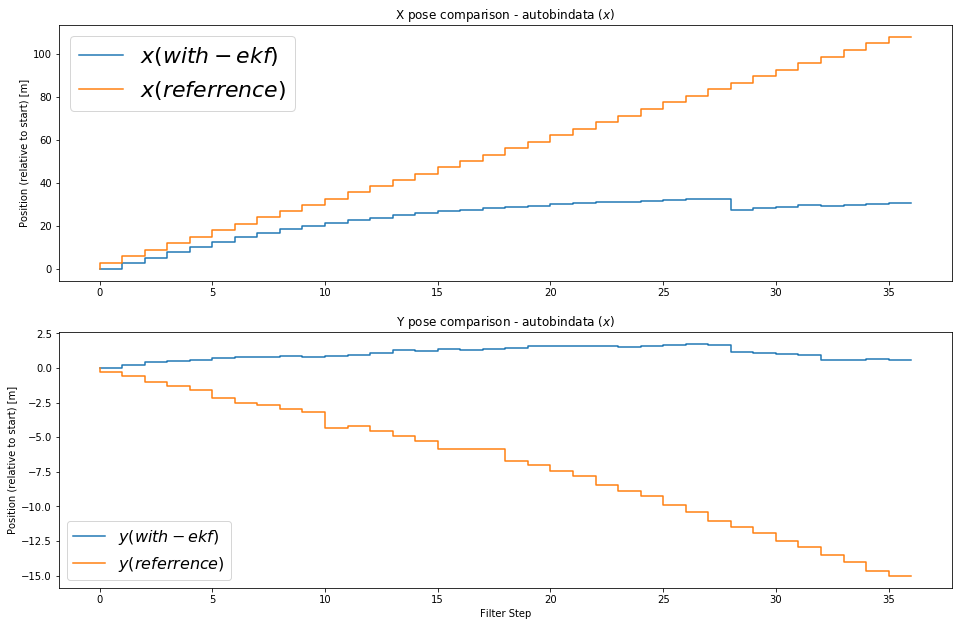

In [40]:
plotx()

In [41]:
def plotxy():

    fig = plt.figure(figsize=(16,9))
    #plt.axis([-200, 100, -250, 0])

    # EKF State

    #plt.plot(predict_x,predict_y, label='EKF Position', c='k', lw=5)
    #plt.axis([-200, 100, -250, 0])
    #plt.scatter(predict_x[::5],predict_y[::5], s=5,c='#e377c2', label='EKF Position', marker='+')
    #plt.scatter(mx[::5],my[::5], s=50, label='GPS Measurements', alpha=0.5, marker='+')
    #plt.plot(predict_x,predict_y, label='EKF Position', c='b', lw=1)
    plt.scatter(ref_x[::1],ref_y[::1], s=10, label='Ref Measurements', marker='x')

    #plt.plot(real_x,real_y, label='GPS Measurements', c='k', lw=1)
    # Measurements
    plt.scatter(ekf_x[::2],ekf_y[::2], s=10, label='EKF Measurements', marker='+')
    #cbar=plt.colorbar(ticks=np.arange(20))
    #cbar.ax.set_ylabel(u'EPE', rotation=270)
    #cbar.ax.set_xlabel(u'm')

    #
    # Start/Goal
    plt.scatter(ref_x[0],ref_y[0], s=60, label='Start', c='g')
    plt.scatter(ref_x[-1],ref_y[-1], s=60, label='Goal', c='r')
    #plt.xlim(-200, 100)
    #plt.ylim(-250, 0)
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.title('Position-Autobin-data')
    plt.legend(loc='best')
    plt.axis('equal')
    #plt.tight_layout()

    #plt.savefig('graph/autobin/XY-Autobin-data-EKF-with-scanmatching.png',
    #S            dpi=72, transparent=True, bbox_inches='tight')

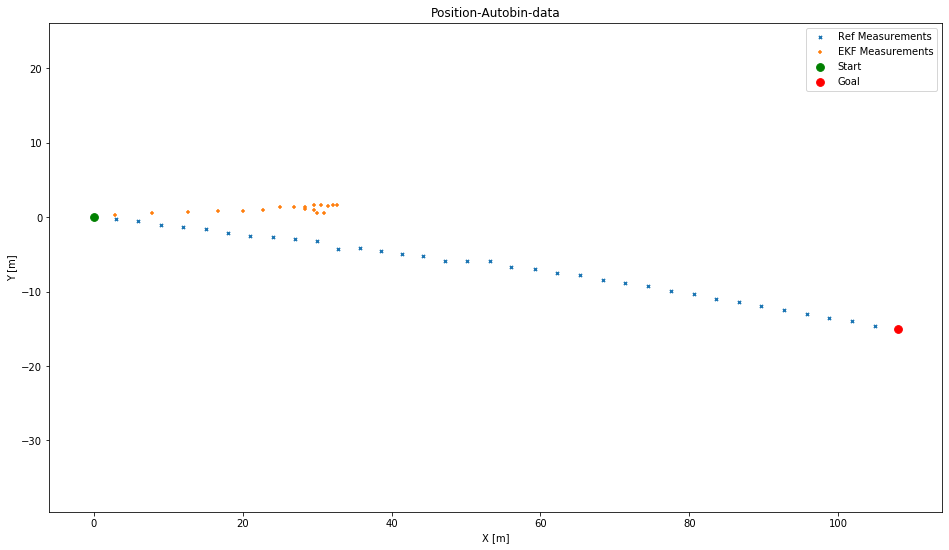

In [42]:
plotxy()